In [1]:
from analysis_tools import read_results_dict, read_results_exp_dict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from utility import utility as util
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib as mpl
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42

In [2]:
percs = [25, 50, 75, 100]

baseline_old_d = {}

tau1_online_d = {}
tau3_online_d = {}

baseline_old_d['0'] = util.load_result('../w_mc_results/laxity_mapping/tau_1_contract_online_algo_revenue_original_0_run1')
for perc in percs:
    baseline_old_d[str(perc)] = util.load_result('../w_mc_results/baseline_revenue_'+str(perc))

l_baseline_old = np.array([np.sum(baseline_old_d['0']['total_revenue_0_run0_E'])] * 4)

bid_few_d = {}
bid_few_d['0'] = util.load_result('../bids_no_solar_2019_few_sample/0_perc/bid_sample_path_0_perc')

bid_2020_d = {}
bid_2020_d['0'] = util.load_result("../bids_no_solar/0_perc/bid_sample_path_0_perc")

In [3]:
baseline_old_asap_d = {}
baseline_old_asap_d['0'] = util.load_result('../w_mc_results/contract_no_solar/ev_asap_contract_revenue_0')

baseline_old_asap = np.sum(baseline_old_asap_d['0']['total_revenue_0_samples_100_E'])
print(baseline_old_asap)

20164.29176681926


In [4]:
bids = np.mean(bid_few_d['0'], axis = 1).flatten()
df_price = pd.read_csv('../real_data/2019_test_data_price.csv')
df_price["price_da"] = np.maximum(df_price["price_da"], 0 )
print(df_price["price_da"].shape)
print(bids.shape)
np.sum(np.multiply(bids, df_price["price_da"]))

(8760,)
(8760,)


-3926.909316

In [5]:
print(bids[0:60])
df_price[0:60]

[  0.    0.    0.    0.    0.    0.    0.    0.    0.  -11.  -39.6 -34.1
 -33.   -2.2   0.   -1.1   0.    0.   -5.5 -16.5   0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.   -5.5   0.  -13.2 -42.9 -45.1 -38.5
 -44.  -37.4 -37.4 -35.2   0.  -34.1  -7.7 -27.5  -2.2  -2.2  -2.2   0.
   0.    0.    0.    0.    0.    0.    0.    0.   -4.4 -15.4   0.    0. ]


,Date,price_da,price_imbalance,Hour
0,2019-01-01,0.06892,0.044312,0
1,2019-01-01,0.06498,0.039895,1
2,2019-01-01,0.06027,0.041103,2
3,2019-01-01,0.04997,0.038108,3
4,2019-01-01,0.04766,0.034730,4
5,2019-01-01,0.04800,0.027127,5
6,2019-01-01,0.04975,0.033538,6
7,2019-01-01,0.05512,0.032350,7
8,2019-01-01,0.04480,0.001160,8
9,2019-01-01,0.04958,0.042080,9


In [6]:
np.multiply(bids, df_price["price_da"])[0:60]

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9    -0.545380
10   -2.195424
11   -2.135342
12   -1.894200
13   -0.111672
14    0.000000
15   -0.055055
16    0.000000
17    0.000000
18   -0.277805
19   -0.781275
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.000000
30   -0.263230
31    0.000000
32   -0.691944
33   -2.248818
34   -2.361436
35   -1.999690
36   -2.269960
37   -1.936198
38   -1.967614
39   -2.112000
40    0.000000
41   -2.728000
42   -0.598059
43   -2.104575
44   -0.148038
45   -0.122408
46   -0.118382
47    0.000000
48    0.000000
49    0.000000
50    0.000000
51    0.000000
52    0.000000
53    0.000000
54    0.000000
55    0.000000
56   -0.286352
57   -1.163932
58    0.000000
59    0.000000
Name: price_da, dtype: float64

In [7]:
print(l_baseline_old)

[20365.06134719 20365.06134719 20365.06134719 20365.06134719]


In [8]:
!ls ../w_mc_results/laxity_mapping/

tau_1_contract_online_algo_revenue_original_0_run1
tau_1_contract_online_algo_revenue_original_100_run1
tau_1_contract_online_algo_revenue_original_25_run1
tau_1_contract_online_algo_revenue_original_25_run2
tau_1_contract_online_algo_revenue_original_50_run1
tau_1_contract_online_algo_revenue_original_75_run1
tau_3_contract_online_algo_revenue_original_100_run1
tau_3_contract_online_algo_revenue_original_25_run1
tau_3_contract_online_algo_revenue_original_50_run1
tau_3_contract_online_algo_revenue_original_75_run1


In [9]:
print("Shape bid 2020", np.array(bid_2020_d['0']).shape)
print("Shape bid 2020", np.array(bid_few_d['0']).shape)

Shape bid 2020 (366, 100, 24)
Shape bid 2020 (365, 10, 24)


In [10]:
print("Sum bid 2020", np.array(bid_2020_d['0']).sum() // 10)
print("Sum bid few ", np.array(bid_few_d['0']).sum())

Sum bid 2020 -918595.0
Sum bid few  -892045.0


In [11]:
baseline_oldEVreal_d = util.load_result("../w_mc_results/contract_no_solar/ev_asap_contract_revenue_oldBidrealEV_0")
baseline_oldEVreal = np.sum(baseline_oldEVreal_d['total_revenue_0_samples_100_E'])
baseline_fewEVreal_d = util.load_result("../w_mc_results/contract_no_solar/ev_asap_contract_revenue_fewBidrealEV_0")
print(baseline_fewEVreal_d.keys())
baseline_fewEVreal = np.sum(baseline_fewEVreal_d['total_revenue_0_samples_100_E'])
baseline_fewEVreal_im_buy     = np.sum(baseline_fewEVreal_d["im_buy_0_samples_100_E"])
baseline_fewEVreal_im_sell    = np.sum(baseline_fewEVreal_d["im_sell_0_samples_100_E"])
baseline_fewEVreal_da_rev     = np.sum(baseline_fewEVreal_d["da_revenue0_samples_100_E"])
baseline_fewEVreal_retail_rev = np.sum(baseline_fewEVreal_d["retail_revenue0_samples_100_E"])
baseline_fewEVreal_market_rev = baseline_fewEVreal_im_buy + baseline_fewEVreal_im_sell + baseline_fewEVreal_da_rev
baseline_fewEVreal_total = baseline_fewEVreal_im_buy+ baseline_fewEVreal_im_sell+ baseline_fewEVreal_da_rev+ baseline_fewEVreal_retail_rev
print(f"{baseline_fewEVreal=:.2f}, {baseline_fewEVreal_total=:.2f}")
print(f"{baseline_fewEVreal_im_buy=:.2f}, {baseline_fewEVreal_im_sell=:.2f}, {baseline_fewEVreal_da_rev=:.2f}, {baseline_fewEVreal_retail_rev=:.2f},")

####

baseline_allEVreal_d = util.load_result("../w_mc_results/contract_no_solar/ev_asap_contract_revenue_allBidrealEV_0")
print(baseline_allEVreal_d.keys())
baseline_allEVreal = np.sum(baseline_allEVreal_d['total_revenue_0_samples_100_E'])
baseline_allEVreal_im_buy     = np.sum(baseline_allEVreal_d["im_buy_0_samples_100_E"])
baseline_allEVreal_im_sell    = np.sum(baseline_allEVreal_d["im_sell_0_samples_100_E"])
baseline_allEVreal_da_rev     = np.sum(baseline_allEVreal_d["da_revenue0_samples_100_E"])
baseline_allEVreal_retail_rev = np.sum(baseline_allEVreal_d["retail_revenue0_samples_100_E"])

baseline_allEVreal_market_rev = baseline_allEVreal_im_buy + baseline_allEVreal_im_sell + baseline_allEVreal_da_rev
baseline_allEVreal_total = baseline_allEVreal_im_buy+ baseline_allEVreal_im_sell+ baseline_allEVreal_da_rev+ baseline_allEVreal_retail_rev
print("Baseline_allEVreal")
print(f"{baseline_allEVreal=:.2f}, {baseline_allEVreal_total=:.2f}")
print(f"{baseline_allEVreal_im_buy=:.2f}, {baseline_allEVreal_im_sell=:.2f}, {baseline_allEVreal_da_rev=:.2f}, {baseline_allEVreal_retail_rev=:.2f},")

####
print(f"{baseline_old_asap=:.2f}, {baseline_oldEVreal=:.2f}, {baseline_fewEVreal=:.2f}")

noperc_oldEVreal_d = util.load_result("../w_mc_results/realVisits/tau_1_contract_online_algo_revenue_original_0_newEVoldBid_tau1")
noperc_oldEVreal = np.sum(noperc_oldEVreal_d["total_revenue_0_run0_E"])
noperc_fewEVreal_d = util.load_result("../w_mc_results/realVisits/tau_1_contract_online_algo_revenue_original_0_newEVfewBid_tau1")
noperc_fewEVreal = np.sum(noperc_fewEVreal_d["total_revenue_0_run0_E"])
print(f"{noperc_oldEVreal=:.2f}, {noperc_fewEVreal=:.2f}")

df_oldBids = read_results_dict([1,2,3], [50, 100], 0.2, 0.01, f"newEVoldBid",
                                 f"tau_1_contract_online_algo_revenue_original_<perc>_newEVoldBid_tau<tau>",
                                 directory = '../w_mc_results/realVisits/')
df_fewBids = read_results_dict([1,2,3], [50, 100], 0.2, 0.01, f"newEVoldBid",
                                 f"tau_1_contract_online_algo_revenue_original_<perc>_newEVfewBid_tau<tau>",
                                 directory = '../w_mc_results/realVisits/')

display(df_oldBids)
display(df_fewBids)

dict_keys(['total_revenue_0_samples_100_E', 'im_buy_0_samples_100_E', 'im_sell_0_samples_100_E', 'time_to_full_soc_0_samples_100_E', 'da_revenue0_samples_100_E', 'retail_revenue0_samples_100_E'])
baseline_fewEVreal=21546.69, baseline_fewEVreal_total=21546.69
baseline_fewEVreal_im_buy=-5803.17, baseline_fewEVreal_im_sell=2412.95, baseline_fewEVreal_da_rev=-3926.91, baseline_fewEVreal_retail_rev=28863.82,
dict_keys(['total_revenue_0_samples_100_E', 'im_buy_0_samples_100_E', 'im_sell_0_samples_100_E', 'time_to_full_soc_0_samples_100_E', 'da_revenue0_samples_100_E', 'retail_revenue0_samples_100_E'])
Baseline_allEVreal
baseline_allEVreal=21544.87, baseline_allEVreal_total=21544.87
baseline_allEVreal_im_buy=-5739.39, baseline_allEVreal_im_sell=2362.27, baseline_allEVreal_da_rev=-3941.82, baseline_allEVreal_retail_rev=28863.82,
baseline_old_asap=20164.29, baseline_oldEVreal=18898.52, baseline_fewEVreal=21546.69
noperc_oldEVreal=18929.45, noperc_fewEVreal=21577.62


,tau,perc,kappa,gamma,revenue,participation,type
0,1,50,0.2,0.01,19432.966797,1266,newEVoldBid
1,1,100,0.2,0.01,20069.944745,2649,newEVoldBid
2,2,50,0.2,0.01,19862.811886,1347,newEVoldBid
3,2,100,0.2,0.01,20904.682960,2632,newEVoldBid
4,3,50,0.2,0.01,20204.895179,1268,newEVoldBid
5,3,100,0.2,0.01,21616.451464,2563,newEVoldBid


,tau,perc,kappa,gamma,revenue,participation,type
0,1,50,0.2,0.01,23409.826365,1266,newEVoldBid
1,1,100,0.2,0.01,25363.449576,2649,newEVoldBid
2,2,50,0.2,0.01,23839.671455,1347,newEVoldBid
3,2,100,0.2,0.01,26198.187792,2632,newEVoldBid
4,3,50,0.2,0.01,24181.754748,1268,newEVoldBid
5,3,100,0.2,0.01,26909.956295,2563,newEVoldBid


In [12]:
dict_result = util.load_result('../w_mc_results/realVisits/tau_1_contract_online_algo_revenue_original_25_newEVfewBid_tau1')
dict_result.keys()

dict_keys(['total_revenue_25_run0_E', 'im_buy_25_run0_E', 'im_sell_25_run0_E', 'time_to_full_soc_25_run0_E', 'num_v2g_evs_no_contract_lst_25_run0_E', 'num_v2g_evs_w_contract_lst_25_run0_E', 'da_revenue25_run0_E', 'retail_revenue25_run0_E', 'owner_pay25_run0_E', 'assigned_type25_run0_E', 'realized_type25_run0_E', 'total_revenue_25_run0_R', 'im_buy_25_run0_R', 'im_sell_25_run0_R', 'time_to_full_soc_25_run0_R'])

In [13]:
# Revenue breakdown
total_rev = np.array(dict_result['total_revenue_25_run0_E']).sum()
im_buy = np.array(dict_result['im_buy_25_run0_E']).sum()
im_sell = np.array(dict_result['im_sell_25_run0_E']).sum()
da_rev = np.array(dict_result['da_revenue25_run0_E']).sum()
retail_rev = np.array(dict_result["retail_revenue25_run0_E"]).sum()
owner_pay = np.array(dict_result["owner_pay25_run0_E"]).sum()

print(f"{total_rev=:.2f}, {im_buy=:.2f}, {im_sell=:.2f}, {da_rev=:.2f}, {retail_rev=:.2f}, {owner_pay=:.2f}")
print(im_buy + im_sell + da_rev + retail_rev + owner_pay)

total_rev=22535.08, im_buy=-6581.46, im_sell=2208.23, da_rev=-2059.71, retail_rev=29136.69, owner_pay=-168.68
22535.075161756864


In [14]:
assigned_type_ll = dict_result["assigned_type25_run0_E"]
assigned_type = np.array([item for assigned_type_l in assigned_type_ll for item in assigned_type_l])
realized_type_ll = dict_result["realized_type25_run0_E"]
realized_type = np.array([item for realized_type_l in realized_type_ll for item in realized_type_l])
print(f"{len(assigned_type)=}, {len(realized_type)=}")
print("Assigned type", np.unique(assigned_type, return_counts = True))
print("Realized type", np.unique(realized_type, return_counts=True))

print(np.array(bid_2020_d['0'][:365]).shape)
print(np.array(bid_2020_d['0'][:365]).mean(axis=1).sum().shape)
da_rev = np.array(bid_2020_d['0'][:365]).mean(axis=1).sum()

len(assigned_type)=2319, len(realized_type)=2319
Assigned type (array([0, 1, 2, 3, 4]), array([462, 474, 459, 478, 446]))
Realized type (array([-1,  0,  1,  2,  3,  4]), array([ 514, 1151,  284,  124,  127,  119]))
(365, 100, 24)
()


In [15]:
df_fewBids = read_results_dict([1,2,3], [50, 100], 0.2, 0.01, f"newEVoldBid",
                                 f"tau_1_contract_online_algo_revenue_original_<perc>_newEVfewBid_tau<tau>",
                                 directory = '../w_mc_results/realVisits/')
df_fewBids.head()

,tau,perc,kappa,gamma,revenue,participation,type
0,1,50,0.2,0.01,23409.826365,1266,newEVoldBid
1,1,100,0.2,0.01,25363.449576,2649,newEVoldBid
2,2,50,0.2,0.01,23839.671455,1347,newEVoldBid
3,2,100,0.2,0.01,26198.187792,2632,newEVoldBid
4,3,50,0.2,0.01,24181.754748,1268,newEVoldBid


In [16]:
dict_temp = util.load_result('../w_mc_results/realVisits/tau_1_contract_online_algo_revenue_original_100_unifEVfewBid_tau1')
dict_temp.keys()

dict_keys(['total_revenue_100_run0_E', 'im_buy_100_run0_E', 'im_sell_100_run0_E', 'time_to_full_soc_100_run0_E', 'num_v2g_evs_no_contract_lst_100_run0_E', 'num_v2g_evs_w_contract_lst_100_run0_E', 'da_revenue100_run0_E', 'retail_revenue100_run0_E', 'owner_pay100_run0_E', 'assigned_type100_run0_E', 'realized_type100_run0_E', 'total_revenue_100_run0_R', 'im_buy_100_run0_R', 'im_sell_100_run0_R', 'time_to_full_soc_100_run0_R'])

## Load result

In [17]:
df_zfew_0 = read_results_exp_dict([1], [0], 0.2, 0.01, "newEVfewBid",
                                      "tau_1_contract_online_algo_revenue_original_<perc>_zero_utl_newEVfewBid_tau<tau>",
                                       directory = '../w_mc_results/realVisits/')
display(df_zfew_0.head())
df_zfew_0 = read_results_exp_dict([1], [0], 0.2, 0.01, "newEVfewBid",
                                      "tau_1_contract_online_algo_revenue_original_<perc>_zero_utl_newEVfewBid_tau<tau>_v2",
                                       directory = '../w_mc_results/realVisits/')
display(df_zfew_0.head())

df_zfew_0 = read_results_exp_dict([1], [0], 0.2, 0.01, "newEVfewBid",
                                      "tau_1_contract_online_algo_revenue_original_<perc>_zero_utl_newEVallBid_tau<tau>",
                                       directory = '../w_mc_results/realVisits/')
display(df_zfew_0.head())
df_zfew_0 = read_results_exp_dict([1], [0], 0.2, 0.01, "newEVfewBid",
                                      "tau_1_contract_online_algo_revenue_original_<perc>_newEVfewBid_tau<tau>",
                                       directory = '../w_mc_results/realVisits/')
display(df_zfew_0.head())

,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type
0,1,0,0.2,0.01,21577.615526,-5472.581672,2192.709259,-3926.909316,28784.397255,0.0,[],[],[],[],0,0,newEVfewBid


,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type
0,1,0,0.2,0.01,21577.615526,-5472.581672,2192.709259,-3926.909316,28784.397255,0.0,[],[],[],[],0,0,newEVfewBid


,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type
0,1,0,0.2,0.01,21575.792697,-5411.944392,2145.164099,-3941.824263,28784.397255,0.0,[],[],[],[],0,0,newEVfewBid


,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type
0,1,0,0.2,0.01,21577.615526,-5472.581672,2192.709259,-3926.909316,28784.397255,0.0,[],[],[],[],0,0,newEVfewBid


In [18]:
baseline_fewEVreal

21546.689458471432

In [19]:
baseline_allEVreal

21544.866629496428

In [20]:
baseline_fewEVreal_da_rev

-3926.909316

In [21]:
baseline_fewEVreal_retail_rev

28863.816217837837

In [22]:
21577.615526 + 5472.581672 - 2192.709259

24857.487939000002

In [23]:
baseline_fewEVreal_retail_rev + baseline_fewEVreal_da_rev

24936.906901837836

In [24]:
24857.487939000002 - 24936.906901837836

-79.41896283783353

In [25]:
28784.397255 - baseline_fewEVreal_retail_rev

-79.41896283783717

In [26]:
print("With bids 10 paths")
df_zfew_left = read_results_exp_dict([1,2,3], [100], 0.2, 0.01, "leftZFewBid",
                                      "tau_1_contract_online_algo_revenue_original_<perc>_zero_utl_leftEVfewBid_tau<tau>",
                                       directory = '../w_mc_results/realVisits/')

df_zfew_uniform = read_results_exp_dict([1,2,3], [100], 0.2, 0.01, "unifZFewBid",
                                      "tau_1_contract_online_algo_revenue_original_<perc>_zero_utl_unifEVfewBid_tau<tau>",
                                       directory = '../w_mc_results/realVisits/')

df_zfew_right = read_results_exp_dict([1,2,3], [100], 0.2, 0.01, "rightZFewBid",
                                      "tau_1_contract_online_algo_revenue_original_<perc>_zero_utl_rightEVfewBid_tau<tau>",
                                       directory = '../w_mc_results/realVisits/')

#df_zfew_uniform["total_assigned"] = df_zfew_uniform['assigned_counts'].apply(lambda x: np.sum(x))
#df_zfew_uniform["total_realized"] = df_zfew_uniform['realized_counts'].apply(lambda x: np.sum(x))

#df_zfew_left["total_rev_og"] = df_zfew_left["total_rev"]
#df_zfew_uniform["total_rev_og"] = df_zfew_uniform["total_rev"]
#df_zfew_right["total_rev_og"] = df_zfew_right["total_rev"]

#df_zfew_left["retail_rev"]    = baseline_fewEVreal_retail_rev
#f_zfew_uniform["retail_rev"] = baseline_fewEVreal_retail_rev
#df_zfew_right["retail_rev"]   = baseline_fewEVreal_retail_rev
#df_zfew_left["da_rev"]    = baseline_fewEVreal_da_rev

#df_zfew_uniform["da_rev"] = baseline_fewEVreal_da_rev

#df_zfew_right["da_rev"]   = baseline_fewEVreal_da_rev
#df_zfew_left["market_rev"]    =  df_zfew_left["im_buy"]    + df_zfew_left["im_sell"] + df_zfew_left["da_rev"]
df_zfew_uniform["market_rev"] =  df_zfew_uniform["im_buy"] + df_zfew_uniform["im_sell"] + df_zfew_uniform["da_rev"] + baseline_fewEVreal_retail_rev
df_zfew_left["market_rev"] =  df_zfew_left["im_buy"] + df_zfew_left["im_sell"] + df_zfew_left["da_rev"] + baseline_fewEVreal_retail_rev
df_zfew_right["market_rev"] =  df_zfew_right["im_buy"] + df_zfew_right["im_sell"] + df_zfew_right["da_rev"] + baseline_fewEVreal_retail_rev
#df_zfew_right["market_rev"]   =  df_zfew_right["im_buy"]   + df_zfew_right["im_sell"] + df_zfew_right["da_rev"]
#df_zfew_left["total_rev"]     = df_zfew_left["retail_rev"]    + df_zfew_left["market_rev"]       + df_zfew_left["owner_pay"]
#df_zfew_uniform["total_rev"]  = df_zfew_uniform["retail_rev"] + df_zfew_uniform["market_rev"] + df_zfew_uniform["owner_pay"]
#df_zfew_right["total_rev"]    = df_zfew_right["retail_rev"]   + df_zfew_right["market_rev"]     + df_zfew_right["owner_pay"]

#df_zfew_uniform["cte_term"] =  df_zfew_uniform["total_rev"] - df_zfew_uniform["im_buy"]  - df_zfew_uniform["im_sell"]
df_zfew_uniform["total_org"] = df_zfew_uniform["total_rev"]
df_zfew_left["total_org"] = df_zfew_left["total_rev"]
df_zfew_right["total_org"] = df_zfew_right["total_rev"]
df_zfew_uniform["total_rev"] = df_zfew_uniform["im_buy"] +  df_zfew_uniform["im_sell"] +  df_zfew_uniform["da_rev"] + baseline_fewEVreal_retail_rev  +  df_zfew_uniform["owner_pay"]
df_zfew_left["total_rev"] = df_zfew_left["im_buy"] +  df_zfew_right["im_sell"] +  df_zfew_left["da_rev"] + baseline_fewEVreal_retail_rev  +  df_zfew_left["owner_pay"]
df_zfew_right["total_rev"] = df_zfew_right["im_buy"] +  df_zfew_left["im_sell"] +  df_zfew_right["da_rev"] + baseline_fewEVreal_retail_rev  +  df_zfew_right["owner_pay"]


display(df_zfew_left.head())
display(df_zfew_uniform.head())
display(df_zfew_right.head())

With bids 10 paths


,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type,market_rev,total_org
0,1,100,0.2,0.01,24099.265284,-10375.924450,2491.828928,3682.65045,30340.855841,-617.443003,"[0, 1, 2, 3, 4]","[3318, 2603, 1850, 1112, 366]","[-1, 0, 1, 2, 3, 4]","[2129, 5041, 1183, 507, 299, 90]",7120,9249,leftZFewBid,24662.371145,25521.967765
1,2,100,0.2,0.01,24219.893856,-10460.495836,2605.315474,3682.65045,31090.415521,-580.335851,"[0, 1, 2, 3, 4]","[2779, 2063, 1543, 912, 305]","[-1, 0, 1, 2, 3, 4]","[1487, 4044, 1248, 602, 177, 44]",6115,9249,leftZFewBid,24691.286306,26337.549758
2,3,100,0.2,0.01,24431.182488,-10457.493425,2635.681886,3682.65045,31272.662792,-499.819751,"[0, 1, 2, 3, 4]","[2188, 1698, 1130, 701, 221]","[-1, 0, 1, 2, 3, 4]","[976, 2939, 1240, 576, 181, 26]",4962,9249,leftZFewBid,24724.655129,26633.681953


,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type,market_rev,total_org
0,1,100,0.2,0.01,24004.871279,-10399.435447,2526.845053,3682.65045,30565.242442,-669.004995,"[0, 1, 2, 3, 4]","[1834, 1863, 1837, 1839, 1876]","[-1, 0, 1, 2, 3, 4]","[2129, 4516, 1079, 507, 477, 541]",7120,9249,unifZFewBid,24673.876274,25706.297504
1,2,100,0.2,0.01,24059.896846,-10488.185899,2666.820810,3682.65045,31608.859886,-665.204732,"[0, 1, 2, 3, 4]","[1498, 1481, 1536, 1524, 1563]","[-1, 0, 1, 2, 3, 4]","[1487, 3472, 1291, 785, 315, 252]",6115,9249,unifZFewBid,24725.101579,26804.940515
2,3,100,0.2,0.01,24163.144504,-10537.316665,2746.180355,3682.65045,31981.315736,-592.185854,"[0, 1, 2, 3, 4]","[1178, 1246, 1146, 1218, 1150]","[-1, 0, 1, 2, 3, 4]","[976, 2369, 1254, 777, 401, 161]",4962,9249,unifZFewBid,24755.330358,27280.644022


,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type,market_rev,total_org
0,1,100,0.2,0.01,23898.375239,-10417.136546,2546.166069,3682.65045,30834.659314,-722.783810,"[0, 1, 2, 3, 4]","[385, 1050, 1815, 2616, 3383]","[-1, 0, 1, 2, 3, 4]","[2129, 3963, 985, 494, 773, 905]",7120,9249,rightZFewBid,24675.496191,25923.555477
1,2,100,0.2,0.01,23876.463404,-10531.751519,2714.258875,3682.65045,32081.485341,-743.567219,"[0, 1, 2, 3, 4]","[288, 912, 1539, 2146, 2717]","[-1, 0, 1, 2, 3, 4]","[1487, 2970, 1253, 1028, 436, 428]",6115,9249,rightZFewBid,24728.974025,27203.075928
2,3,100,0.2,0.01,23896.195283,-10607.745128,2842.028996,3682.65045,32649.114452,-678.208144,"[0, 1, 2, 3, 4]","[262, 726, 1176, 1656, 2118]","[-1, 0, 1, 2, 3, 4]","[976, 1878, 1178, 1032, 578, 296]",4962,9249,rightZFewBid,24780.750536,27887.840626


In [27]:
print("With bids 10 paths")
df_few_left = read_results_exp_dict([1,2,3], [100], 0.2, 0.01, "leftFewBid",
                                      "tau_1_contract_online_algo_revenue_original_<perc>_leftEVfewBid_tau<tau>",
                                       directory = '../w_mc_results/realVisits/')
df_few_left["market_rev"] = df_few_left["im_buy"] + df_few_left["im_sell"] + df_few_left["da_rev"]


df_few_uniform = read_results_exp_dict([1,2,3], [100], 0.2, 0.01, "unifFewBid",
                                      "tau_1_contract_online_algo_revenue_original_<perc>_unifEVfewBid_tau<tau>",
                                       directory = '../w_mc_results/realVisits/')
df_few_uniform["market_rev"] = df_few_uniform["im_buy"] + df_few_uniform["im_sell"] + df_few_uniform["da_rev"]


df_few_right = read_results_exp_dict([1,2,3], [100], 0.2, 0.01, "rightFewBid",
                                      "tau_1_contract_online_algo_revenue_original_<perc>_rightEVfewBid_tau<tau>",
                                       directory = '../w_mc_results/realVisits/')
df_few_right["market_rev"] = df_few_right["im_buy"] + df_few_right["im_sell"] + df_few_right["da_rev"]


df_few_left["retail_rev"]    = baseline_fewEVreal_retail_rev
df_few_uniform["retail_rev"] = baseline_fewEVreal_retail_rev
df_few_right["retail_rev"]   = baseline_fewEVreal_retail_rev
df_few_left["total_rev"]    = df_few_left["retail_rev"] + df_few_left["market_rev"] + df_few_left["owner_pay"]
df_few_uniform["total_rev"] = df_few_uniform["retail_rev"] + df_few_uniform["market_rev"] + df_few_uniform["owner_pay"]
df_few_right["total_rev"]   = df_few_right["retail_rev"] + df_few_right["market_rev"] + df_few_right["owner_pay"]

display(df_few_left.head())
display(df_few_uniform.head())
display(df_few_right.head())

With bids 10 paths


,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type,market_rev
0,1,100,0.2,0.01,24261.911534,-10241.745288,2247.721859,3682.65045,28863.816218,-290.531705,"[0, 1, 2, 3, 4]","[3315, 2615, 1905, 1073, 341]","[-1, 1, 2, 3, 4]","[7142, 1183, 531, 289, 104]",2107,9249,leftFewBid,-4311.372979
1,2,100,0.2,0.01,24228.847859,-10276.662326,2280.783222,3682.65045,28863.816218,-321.739705,"[0, 1, 2, 3, 4]","[2694, 2162, 1566, 904, 276]","[-1, 1, 2, 3, 4]","[5483, 1288, 598, 176, 57]",2119,9249,leftFewBid,-4313.228654
2,3,100,0.2,0.01,24279.443155,-10299.336531,2344.556992,3682.65045,28863.816218,-312.243974,"[0, 1, 2, 3, 4]","[2159, 1608, 1186, 736, 249]","[-1, 1, 2, 3, 4]","[3904, 1215, 575, 217, 27]",2034,9249,leftFewBid,-4272.129089


,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type,market_rev
0,1,100,0.2,0.01,24190.769134,-10270.396217,2291.499856,3682.65045,28863.816218,-376.801173,"[0, 1, 2, 3, 4]","[1840, 1861, 1864, 1924, 1760]","[-1, 1, 2, 3, 4]","[6612, 1096, 513, 550, 478]",2637,9249,unifFewBid,-4296.245911
1,2,100,0.2,0.01,24170.917449,-10332.046990,2395.463627,3682.65045,28863.816218,-438.965856,"[0, 1, 2, 3, 4]","[1489, 1523, 1535, 1607, 1448]","[-1, 1, 2, 3, 4]","[4958, 1272, 793, 328, 251]",2644,9249,unifFewBid,-4253.932913
2,3,100,0.2,0.01,24229.880850,-10364.902984,2478.098150,3682.65045,28863.816218,-429.780983,"[0, 1, 2, 3, 4]","[1217, 1175, 1148, 1165, 1233]","[-1, 1, 2, 3, 4]","[3421, 1157, 786, 400, 174]",2517,9249,unifFewBid,-4204.154385


,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type,market_rev
0,1,100,0.2,0.01,24158.742214,-10295.102364,2372.948519,3682.65045,28863.816218,-465.570609,"[0, 1, 2, 3, 4]","[354, 1127, 1834, 2615, 3319]","[-1, 1, 2, 3, 4]","[6065, 1014, 516, 730, 924]",3184,9249,rightFewBid,-4239.503395
1,2,100,0.2,0.01,24122.694230,-10393.034897,2522.816169,3682.65045,28863.816218,-553.553709,"[0, 1, 2, 3, 4]","[287, 913, 1494, 2162, 2746]","[-1, 1, 2, 3, 4]","[4447, 1244, 1005, 434, 472]",3155,9249,rightFewBid,-4187.568278
2,3,100,0.2,0.01,24186.942086,-10467.544399,2665.185117,3682.65045,28863.816218,-557.165301,"[0, 1, 2, 3, 4]","[241, 739, 1179, 1608, 2171]","[-1, 1, 2, 3, 4]","[2836, 1227, 976, 594, 305]",3102,9249,rightFewBid,-4119.708831


In [28]:
print("With bids 100 paths")
df_all_left = read_results_exp_dict([1,2,3], [100], 0.2, 0.01, "leftFewBid",
                                      "tau_1_contract_online_algo_revenue_original_<perc>_zero_utl_leftEVallBid_tau<tau>",
                                       directory = '../w_mc_results/realVisits/')
df_all_left["market_rev"] = df_all_left["im_buy"] + df_all_left["im_sell"] + df_all_left["da_rev"]


df_all_uniform = read_results_exp_dict([1,2,3], [100], 0.2, 0.01, "unifFewBid",
                                      "tau_1_contract_online_algo_revenue_original_<perc>_zero_utl_unifEVallBid_tau<tau>",
                                       directory = '../w_mc_results/realVisits/')
df_all_uniform["market_rev"] = df_all_uniform["im_buy"] + df_all_uniform["im_sell"] + df_all_uniform["da_rev"]


df_all_right = read_results_exp_dict([1,2,3], [100], 0.2, 0.01, "rightFewBid",
                                      "tau_1_contract_online_algo_revenue_original_<perc>_zero_utl_rightEVallBid_tau<tau>",
                                       directory = '../w_mc_results/realVisits/')

df_all_right["market_rev"] = df_all_right["im_buy"] + df_all_right["im_sell"] + df_all_right["da_rev"]

# Baseline correction
df_all_left["retail_rev"]    = baseline_allEVreal_retail_rev
df_all_uniform["retail_rev"] = baseline_allEVreal_retail_rev
df_all_right["retail_rev"]   = baseline_allEVreal_retail_rev
df_all_left["total_rev"]    = df_all_left["retail_rev"] + df_all_left["market_rev"] + df_all_left["owner_pay"]
df_all_uniform["total_rev"] = df_all_uniform["retail_rev"] + df_all_uniform["market_rev"] + df_all_uniform["owner_pay"]
df_all_right["total_rev"]   = df_all_right["retail_rev"] + df_all_right["market_rev"] + df_all_right["owner_pay"]

display(df_all_left.head())
display(df_all_uniform.head())
display(df_all_right.head())

With bids 100 paths


,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type,market_rev
0,1,100,0.2,0.01,24044.119829,-10302.152446,2431.943398,3667.955663,28863.816218,-617.443003,"[0, 1, 2, 3, 4]","[3318, 2603, 1850, 1112, 366]","[-1, 0, 1, 2, 3, 4]","[2129, 5041, 1183, 507, 299, 90]",7120,9249,leftFewBid,-4202.253386
1,2,100,0.2,0.01,24110.142141,-10386.603639,2545.309752,3667.955663,28863.816218,-580.335851,"[0, 1, 2, 3, 4]","[2779, 2063, 1543, 912, 305]","[-1, 0, 1, 2, 3, 4]","[1487, 4044, 1248, 602, 177, 44]",6115,9249,leftFewBid,-4173.338225
2,3,100,0.2,0.01,24224.027065,-10382.474353,2574.549288,3667.955663,28863.816218,-499.819751,"[0, 1, 2, 3, 4]","[2188, 1698, 1130, 701, 221]","[-1, 0, 1, 2, 3, 4]","[976, 2939, 1240, 576, 181, 26]",4962,9249,leftFewBid,-4139.969402


,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type,market_rev
0,1,100,0.2,0.01,24004.062966,-10323.848248,2465.144328,3667.955663,28863.816218,-669.004995,"[0, 1, 2, 3, 4]","[1834, 1863, 1837, 1839, 1876]","[-1, 0, 1, 2, 3, 4]","[2129, 4516, 1079, 507, 477, 541]",7120,9249,unifFewBid,-4190.748257
1,2,100,0.2,0.01,24059.088533,-10416.812044,2609.333429,3667.955663,28863.816218,-665.204732,"[0, 1, 2, 3, 4]","[1498, 1481, 1536, 1524, 1563]","[-1, 0, 1, 2, 3, 4]","[1487, 3472, 1291, 785, 315, 252]",6115,9249,unifFewBid,-4139.522952
2,3,100,0.2,0.01,24162.336191,-10470.884109,2693.634274,3667.955663,28863.816218,-592.185854,"[0, 1, 2, 3, 4]","[1178, 1246, 1146, 1218, 1150]","[-1, 0, 1, 2, 3, 4]","[976, 2369, 1254, 777, 401, 161]",4962,9249,unifFewBid,-4109.294173


,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type,market_rev
0,1,100,0.2,0.01,23951.904067,-10342.072502,2484.988499,3667.955663,28863.816218,-722.783810,"[0, 1, 2, 3, 4]","[385, 1050, 1815, 2616, 3383]","[-1, 0, 1, 2, 3, 4]","[2129, 3963, 985, 494, 773, 905]",7120,9249,rightFewBid,-4189.128340
1,2,100,0.2,0.01,23984.598492,-10462.583747,2658.977578,3667.955663,28863.816218,-743.567219,"[0, 1, 2, 3, 4]","[288, 912, 1539, 2146, 2717]","[-1, 0, 1, 2, 3, 4]","[1487, 2970, 1253, 1028, 436, 428]",6115,9249,rightFewBid,-4135.650506
2,3,100,0.2,0.01,24101.734079,-10538.424876,2786.595219,3667.955663,28863.816218,-678.208144,"[0, 1, 2, 3, 4]","[262, 726, 1176, 1656, 2118]","[-1, 0, 1, 2, 3, 4]","[976, 1878, 1178, 1032, 578, 296]",4962,9249,rightFewBid,-4083.873995


In [29]:
# No V2G baseline
print("With bids 100 paths")
df_all_nov2g = read_results_exp_dict([1,2,3], [100], 0.2, 0.01, "all_nov2g",
                                      "tau_1_contract_online_algo_revenue_original_<perc>_nov2g_tau<tau>",
                                       directory = '../w_mc_results/noV2G/')
df_all_nov2g["market_rev"] = df_all_nov2g["im_buy"] + df_all_nov2g["im_sell"] + df_all_nov2g["da_rev"]


# Baseline correction
df_all_nov2g["retail_rev"]  = baseline_allEVreal_retail_rev
df_all_nov2g["total_rev"]   = df_all_nov2g["retail_rev"] + df_all_nov2g["market_rev"] + df_all_nov2g["owner_pay"]

display(df_all_nov2g.head())

With bids 100 paths


,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type,market_rev
0,1,100,0.2,0.01,22014.107864,-5518.563696,2610.679606,-3941.824263,28863.816218,0.0,"[0, 1, 2, 3, 4]","[1834, 1863, 1837, 1839, 1876]","[0, 1, 2, 3, 4]","[1834, 1863, 1837, 1839, 1876]",9249,9249,all_nov2g,-6849.708354
1,2,100,0.2,0.01,22014.107864,-5518.563696,2610.679606,-3941.824263,28863.816218,0.0,"[0, 1, 2, 3, 4]","[1885, 1816, 1854, 1862, 1832]","[0, 1, 2, 3, 4]","[1885, 1816, 1854, 1862, 1832]",9249,9249,all_nov2g,-6849.708354
2,3,100,0.2,0.01,22014.107864,-5518.563696,2610.679606,-3941.824263,28863.816218,0.0,"[0, 1, 2, 3, 4]","[1886, 1861, 1818, 1803, 1881]","[0, 1, 2, 3, 4]","[1886, 1861, 1818, 1803, 1881]",9249,9249,all_nov2g,-6849.708354


In [30]:
print("No-Control Values")
print(f"{baseline_allEVreal=}")
print(f"{baseline_allEVreal_retail_rev=}")
print(f"{baseline_allEVreal_market_rev=}")

No-Control Values
baseline_allEVreal=21544.866629496428
baseline_allEVreal_retail_rev=28863.816217837837
baseline_allEVreal_market_rev=-7318.9495883414065


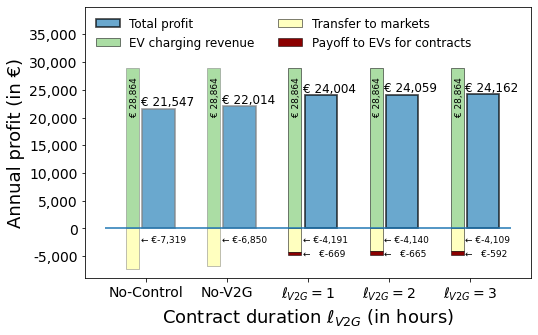

In [31]:
# Still needs work, but that's the idea
fig1 = plt.figure(figsize = (8,5))
ax1 = fig1.add_subplot(1,1,1)

barwidth = 0.16
alpha1 = 0.7
alpha2 = 1
# baseline
#ax1.hlines(baseline_fewEVreal, 0, 3.2, color = "red", ls = "--")

# No-Control Baseline
ax1.bar(0+barwidth, baseline_allEVreal,            color= "#2b83ba",  edgecolor = "grey", linewidth = 1.75, alpha = alpha1, width = barwidth*2.5)
ax1.bar(0-barwidth, baseline_allEVreal_retail_rev, color= "#abdda4", edgecolor = "grey", linewidth = 0.5, alpha = alpha2, width = barwidth)
ax1.bar(0-barwidth, baseline_allEVreal_market_rev, color= "#ffffbf", edgecolor = "grey", linewidth = 0.5, alpha = alpha2, width = barwidth)

# No-V2G Baseline
nov2g_total_rev = df_all_nov2g["total_rev"].iloc[0]
ax1.bar(1+barwidth, nov2g_total_rev, color= "#2b83ba",  edgecolor = "grey", linewidth = 1.75, alpha = alpha1, width = barwidth*2.5)
ax1.bar(1-barwidth, baseline_allEVreal_retail_rev, color= "#abdda4", edgecolor = "grey", linewidth = 0.5, alpha = alpha2, width = barwidth)
ax1.bar(1-barwidth, df_all_nov2g["market_rev"].iloc[0], color= "#ffffbf", edgecolor = "grey", linewidth = 0.5, alpha = alpha2, width = barwidth)

# Results
tau =        df_all_uniform["tau"] + 1
total_rev =  df_all_uniform["total_rev"]
retail_rev = df_all_uniform["retail_rev"]
market_rev = df_all_uniform["market_rev"]
im_buy =     df_all_uniform["im_buy"]
im_sell =    df_all_uniform["im_sell"]
da_rev =     df_all_uniform["da_rev"]
owner_pay =  df_all_uniform["owner_pay"]

ax1.bar(tau+barwidth, total_rev,  width = barwidth*2.5, color = "#2b83ba", edgecolor = "black", linewidth = 1.75, alpha = alpha1, label = "Total profit")
ax1.bar(tau-barwidth, retail_rev, width = barwidth,     color = "#abdda4", edgecolor = "black", linewidth = 0.5, alpha = alpha2, label = "EV charging revenue")
ax1.bar(tau-barwidth, market_rev, width = barwidth,     color = "#ffffbf", edgecolor = "black", linewidth = 0.5, alpha = alpha2, label = "Transfer to markets")
ax1.bar(tau-barwidth, owner_pay,  width = barwidth,     color = "darkred", edgecolor = "black", linewidth = 0.5, alpha = alpha2, label = "Payoff to EVs for contracts", bottom  = market_rev)
# Red #d7191c
ax1.text(0 - 0.06, baseline_fewEVreal + 600, f"€ {baseline_fewEVreal:,.0f}", color = "k", fontsize = 12)
ax1.text(1 - 0.06, nov2g_total_rev + 600, f"€ {nov2g_total_rev:,.0f}", color = "k", fontsize = 12)
for tau_i, total_rev_i in zip(tau, total_rev):
    ax1.text(tau_i - 0.06, total_rev_i + 600, f"€ {total_rev_i:,.0f}", color = "k", fontsize = 12)

ax1.text(0 - barwidth*1.2, 20_000, f" € {baseline_allEVreal_retail_rev:,.0f}", color = "k", fontsize = 9, rotation=90)
ax1.text(1 - barwidth*1.2, 20_000, f" € {baseline_allEVreal_retail_rev:,.0f}", color = "k", fontsize = 9, rotation=90)
    
ax1.text(0 - 0.06, -2_500, f"← €{baseline_allEVreal_market_rev:,.0f}", color = "k", fontsize = 9)
nov2g_market_rev = df_all_nov2g["market_rev"].iloc[0]
ax1.text(1 - 0.06, -2_500, f"← €{nov2g_market_rev:,.0f}", color = "k", fontsize = 9)
for i, tau_i in enumerate(tau):
    ax1.text(tau_i - barwidth*1.2, 20_000, f" € {baseline_allEVreal_retail_rev:,.0f}", color = "k", fontsize = 9, rotation=90)
    ax1.text(tau_i - 0.06, -2_500, f"← €{market_rev[i]:,.0f}", color = "k", fontsize = 9)
    ax1.text(tau_i - 0.06, -5_000, f"←   €{owner_pay[i]:,.0f}", color = "k", fontsize = 9)


x = np.array([0,1,2,3])-barwidth
y = [baseline_allEVreal_market_rev] + list(market_rev + owner_pay)
#ax1.plot(x,y, color = "gray", ls = "--")
#ax1.scatter(x,y, color = "gray", marker = "x")

ax1.legend(loc = "upper left", ncol = 2, fontsize = 12, frameon = False)
ax1.set_ylim(-9000, 40_000)
yticks = np.arange(-5000, 35001, 5000)
ax1.set_yticks(yticks)
ax1.set_yticklabels([f"{y:,.0f}" for y in yticks], fontsize = 14)
ax1.set_xticks([0,1,2,3, 4])
ax1.set_xticklabels(["No-Control", "No-V2G", r"$\ell_{V2G} = 1$", r"$\ell_{V2G} = 2$",r"$\ell_{V2G} = 3$"], fontsize = 14)
ax1.set_xlabel(r"Contract duration $\ell_{V2G}$ (in hours)", fontsize = 18)
ax1.set_ylabel("Annual profit (in €)", fontsize = 18)
ax1.hlines(0, xmin = -0.5, xmax = 4.5)

fig1.savefig("/home/javier/Documents/Escuela/SCRG/Refs/Contracts/Figs/fig_revVPP.pdf", dpi = 1200, bbox_inches='tight')

In [32]:
# Percent decrease in market transfer
print("Percent increase in profit")
[print(f"\ell_v2g {i+1}: {p:.2%}") for i, p in enumerate(np.divide(total_rev, baseline_allEVreal)-1)]
print("\nPercent decrease in Trasfer to markets")
[print(f"\ell_v2g {i+1}: {p:.2%}") for i, p in enumerate(np.divide(baseline_allEVreal_market_rev, market_rev)-1)]
print("\nPayoff to EVs for contracts")
[print(f"\ell_v2g {i+1}: {p:.2f}") for i, p in enumerate(owner_pay)]
print("\nAverage EV charging revenue")
baseline_allEVreal_retail_rev 
all_ev = df_all_uniform["no_participation"].iloc[0]
avg_purchase = baseline_allEVreal_retail_rev / all_ev
print(f"{avg_purchase:.2f}")
num_v2g = df_all_uniform["participation"].to_numpy()
print("\nAll EV")
print(all_ev)
print("\nNum V2G")
[print(f"\ell_v2g {i+1}: {n:.2f}") for i, n in enumerate(num_v2g)]
print("\nAverage offset POV owner")
[print(f"\ell_v2g {i+1}: {p:.2%}") for i, p in enumerate(np.divide(-owner_pay, num_v2g*avg_purchase))]
print()

Percent increase in profit
\ell_v2g 1: 11.41%
\ell_v2g 2: 11.67%
\ell_v2g 3: 12.15%

Percent decrease in Trasfer to markets
\ell_v2g 1: 74.65%
\ell_v2g 2: 76.81%
\ell_v2g 3: 78.11%

Payoff to EVs for contracts
\ell_v2g 1: -669.00
\ell_v2g 2: -665.20
\ell_v2g 3: -592.19

Average EV charging revenue
3.12

All EV
9249

Num V2G
\ell_v2g 1: 7120.00
\ell_v2g 2: 6115.00
\ell_v2g 3: 4962.00

Average offset POV owner
\ell_v2g 1: 3.01%
\ell_v2g 2: 3.49%
\ell_v2g 3: 3.82%



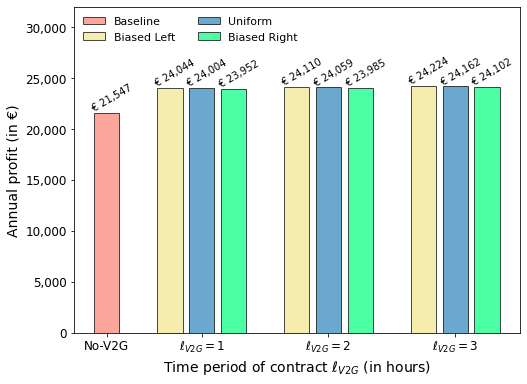

In [33]:
def bar_rev(ax1, df_res, label, offset, color, hatch = None):
    barwidth = 0.2
    tau = df_res["tau"]
    total_rev  = df_res["total_rev"]
    retail_rev = df_res["retail_rev"]
    #market_rev = df_res["market_rev"]
    owner_pay  = df_res["owner_pay"]

    ax1.bar(tau + offset, total_rev, width = barwidth, color = color, alpha = 0.7, label = label, edgecolor = 'black', linewidth = 1, hatch = hatch )
    for tau_i, total_rev_i in zip(tau, total_rev):
        ax1.text(tau_i + offset, total_rev_i + 1200, f"    € {total_rev_i:,.0f}", ha = "center", va = "center", rotation = 30)
    return ax1
    
fig1 = plt.figure(figsize = (8,6))
ax1 = fig1.add_subplot(1,1,1)


#ax1.hlines(baseline_fewEVreal, 0, 3.4, color = "red", ls = "--")
ax1.bar(0.25, baseline_fewEVreal, color = "salmon", width = 0.2, label = "Baseline", edgecolor = 'black', alpha = 0.7, linewidth = 1 )
ax1.text(0.25, baseline_fewEVreal + 1200, f"    € {baseline_fewEVreal:,.0f}", ha = "center", va = "center", rotation = 30)
ax1 = bar_rev(ax1, df_all_left,    "Biased Left",   -0.25, "khaki", hatch = "")
ax1 = bar_rev(ax1, df_all_uniform, "Uniform",           0, "#2b83ba", hatch = "")
ax1 = bar_rev(ax1, df_all_right,    "Biased Right",  0.25, "springgreen", hatch = "")


yticks = np.arange(0, 30001, 5000)
ax1.set_yticks(yticks)
ax1.set_yticklabels([f"{y:,.0f}" for y in yticks], fontsize = 12)
ax1.set_ylim(0, 32000)

ax1.set_xticks([0.25,1,2,3])
ax1.set_xticklabels(["No-V2G",r"$\ell_{V2G} = 1$", r"$\ell_{V2G} = 2$",r"$\ell_{V2G} = 3$"], fontsize = 12)

ax1.set_xlabel(r"Time period of contract $\ell_{V2G}$ (in hours)", fontsize = 14)
ax1.set_ylabel("Annual profit (in €)", fontsize = 14)
ax1.legend(loc = "upper left", frameon = False, fontsize = 11, ncol = 2)



## Type hist

In [34]:
df_zfew_left.columns

Index(['tau', 'perc', 'kappa', 'gamma', 'total_rev', 'im_buy', 'im_sell', 'da_rev', 'retail_rev', 'owner_pay', 'assigned_idx', 'assigned_counts', 'realized_idx', 'realized_counts', 'participation', 'no_participation', 'type', 'market_rev', 'total_org'], dtype='object')

1 [4516 1079  507  477  541]
2 [3472 1291  785  315  252]
3 [2369 1254  777  401  161]


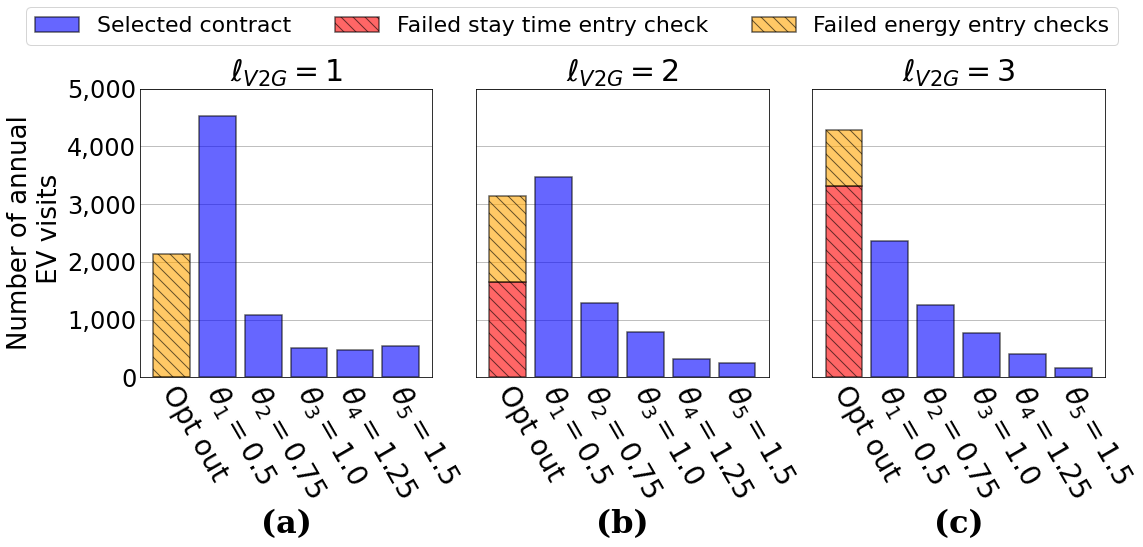

In [43]:
def plot_type(ax, df_res, tau, colors, label, subplot_label):
    alpha = 0.6
    assigned_idx = df_res[df_res["tau"] == tau]["assigned_idx"].iloc[0]
    assigned_counts = df_res[df_res["tau"] == tau]["assigned_counts"].iloc[0]
    all_realized_idx = df_res[df_res["tau"] == tau]["realized_idx"].iloc[0]
    all_realized_counts = df_res[df_res["tau"] == tau]["realized_counts"].iloc[0]
    all_ev = df_res[df_res["tau"] == tau]["no_participation"].iloc[0]
    num_v2g = df_res[df_res["tau"] == tau]["participation"].iloc[0]
    barwidth = 0.8
    no_v2g = all_ev - num_v2g
    realized_idx = all_realized_idx[1:]
    realized_counts = all_realized_counts[1:]
    
    insufficient_stay = no_v2g - all_realized_counts[0]
    insufficient_energy = all_realized_counts[0]
    
    print(tau, realized_counts)
    assigned_offset = np.zeros(len(assigned_idx))
    realized_offset = np.zeros(len(realized_idx))
    #for i in range(-1, 5):
    #    if i in assigned_idx and i in realized_idx:
    #        assigned_offset[np.where(assigned_idx == i)] = -barwidth / 2
    #        realized_offset[np.where(realized_idx == i)] = barwidth  / 2
        
 
    #ax.bar(assigned_idx + assigned_offset,  assigned_counts, label = "Type of EV owner", hatch = "//", alpha = alpha, edgecolor = "black", linewidth = 1, color = colors[0], width = barwidth)
    ax.bar(realized_idx + realized_offset,  realized_counts, label = "Selected contract", hatch = "", alpha = alpha, edgecolor = "black", linewidth = 1.5, color = colors[0], width = barwidth, zorder = 3)
    ax.bar(-1, insufficient_stay, label = "Failed stay time entry check", hatch = "\\\\", alpha = alpha, edgecolor = "black", linewidth = 1.5, color = colors[1], width = barwidth , zorder = 3)
    ax.bar(-1, insufficient_energy, label = "Failed energy entry checks", hatch = "\\\\", alpha = alpha, edgecolor = "black", linewidth = 1.5, color = colors[2], width = barwidth, bottom = insufficient_stay , zorder = 3)
    #ax.bar(-1, no_v2g, label = "Failed entry checks", hatch = "\\\\", alpha = alpha, edgecolor = "black", linewidth = 1.5, color = colors[1], width = barwidth )
    #ax.text(-1, (insufficient_stay+insufficient_energy) + 100, f"{(insufficient_stay+insufficient_energy)/all_ev:.0%}", ha = "center")
    #
    #for rel_idx, rel_ct in zip(realized_idx, realized_counts):
    #    ax.text(rel_idx, rel_ct + 100, f"{rel_ct / all_ev:.0%}", ha = "center")
    
    xticks = np.array([-1, 0, 1, 2, 3, 4]) + 0.5
    xticklabels = ["Opt out", r"$\theta_1 = 0.5$", r"$\theta_2 = 0.75$", r"$\theta_3 = 1.0$", r"$\theta_4 = 1.25$", r"$\theta_5 = 1.5$"]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, rotation = -60, fontsize = 28, ha = "center")
    ax.tick_params(axis='both', which='both', length=0)
    #ax.legend(loc = "upper right", frameon = False)
    
    ax.set_ylim(0,5000)
    ax.grid(axis = "y", zorder = 6)
    
    yticks = np.arange(0, 5001, 1000)
    ax.set_yticks(yticks)
    
    if tau == 1:
        ax.set_yticklabels([f"{y:,}" for y in yticks], fontsize = 24)
    else:
        ax.set_yticklabels([f"" for y in yticks], fontsize = 24)
    
    
    ax.set_xlabel(subplot_label, family= "serif", fontweight = "bold", fontsize = 32, rotation = 0, )
    ax.set_title(r"$\ell_{V2G} = $" + f"{tau}", fontsize = 30)
    
    return ax
fig1 = plt.figure(figsize = (16,7))

ax1 = fig1.add_subplot(1,3,1)
ax2 = fig1.add_subplot(1,3,2)
ax3 = fig1.add_subplot(1,3,3)
#ax2 = fig1.add_subplot(1,1,1)
ax1 = plot_type(ax1, df_all_uniform, 1, ["blue", "red", "orange"], "Contract type distribution", "(a)")
ax2 = plot_type(ax2, df_all_uniform, 2, ["blue", "red", "orange"], "Contract type distribution", "(b)")
ax3 = plot_type(ax3, df_all_uniform, 3, ["blue", "red", "orange"], "Contract type distribution", "(c)")
ax1.set_ylabel("Number of annual\n EV visits", fontsize = 26)

handles, labels = ax1.get_legend_handles_labels()
fig1.legend(handles, labels, loc='upper center', ncol = 6, bbox_to_anchor=(0.5, 1.10), fontsize = 22)

fig1.tight_layout()

fig1.savefig("/home/javier/Documents/Escuela/SCRG/Refs/Contracts/Figs/fig_contractTypes_labelled.pdf", dpi = 600, bbox_inches='tight')

## Other types

## No V2G

In [36]:
print("With bids 100 paths")
df_all_nov2g = read_results_exp_dict([1,2,3], [100], 0.2, 0.01, "all_nov2g",
                                      "tau_1_contract_online_algo_revenue_original_<perc>_nov2g_tau<tau>",
                                       directory = '../w_mc_results/noV2G/')
df_all_nov2g["market_rev"] = df_all_nov2g["im_buy"] + df_all_nov2g["im_sell"] + df_all_nov2g["da_rev"]


# Baseline correction
df_all_nov2g["retail_rev"]  = baseline_allEVreal_retail_rev
df_all_nov2g["total_rev"]   = df_all_nov2g["retail_rev"] + df_all_nov2g["market_rev"] + df_all_nov2g["owner_pay"]

display(df_all_nov2g.head())

With bids 100 paths


,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type,market_rev
0,1,100,0.2,0.01,22014.107864,-5518.563696,2610.679606,-3941.824263,28863.816218,0.0,"[0, 1, 2, 3, 4]","[1834, 1863, 1837, 1839, 1876]","[0, 1, 2, 3, 4]","[1834, 1863, 1837, 1839, 1876]",9249,9249,all_nov2g,-6849.708354
1,2,100,0.2,0.01,22014.107864,-5518.563696,2610.679606,-3941.824263,28863.816218,0.0,"[0, 1, 2, 3, 4]","[1885, 1816, 1854, 1862, 1832]","[0, 1, 2, 3, 4]","[1885, 1816, 1854, 1862, 1832]",9249,9249,all_nov2g,-6849.708354
2,3,100,0.2,0.01,22014.107864,-5518.563696,2610.679606,-3941.824263,28863.816218,0.0,"[0, 1, 2, 3, 4]","[1886, 1861, 1818, 1803, 1881]","[0, 1, 2, 3, 4]","[1886, 1861, 1818, 1803, 1881]",9249,9249,all_nov2g,-6849.708354


In [37]:
print("Same as the other one")
df_all_disa_nov2g = read_results_exp_dict([1,2,3], [100], 0.2, 0.01, "all_nov2g",
                                      "tau_1_contract_online_algo_revenue_original_<perc>_nov2g_disAlphaD_tau<tau>",
                                       directory = '../w_mc_results/noV2G/')
df_all_disa_nov2g["market_rev"] = df_all_disa_nov2g["im_buy"] + df_all_disa_nov2g["im_sell"] + df_all_disa_nov2g["da_rev"]


# Baseline correction
df_all_disa_nov2g["retail_rev"]  = baseline_allEVreal_retail_rev
df_all_disa_nov2g["total_rev"]   = df_all_disa_nov2g["retail_rev"] + df_all_disa_nov2g["market_rev"] + df_all_disa_nov2g["owner_pay"]

display(df_all_disa_nov2g.head())

Same as the other one


,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type,market_rev
0,1,100,0.2,0.01,22014.107864,-5518.563696,2610.679606,-3941.824263,28863.816218,0.0,"[0, 1, 2, 3, 4]","[1834, 1863, 1837, 1839, 1876]","[0, 1, 2, 3, 4]","[1834, 1863, 1837, 1839, 1876]",9249,9249,all_nov2g,-6849.708354
1,2,100,0.2,0.01,22014.107864,-5518.563696,2610.679606,-3941.824263,28863.816218,0.0,"[0, 1, 2, 3, 4]","[1885, 1816, 1854, 1862, 1832]","[0, 1, 2, 3, 4]","[1885, 1816, 1854, 1862, 1832]",9249,9249,all_nov2g,-6849.708354
2,3,100,0.2,0.01,22014.107864,-5518.563696,2610.679606,-3941.824263,28863.816218,0.0,"[0, 1, 2, 3, 4]","[1886, 1861, 1818, 1803, 1881]","[0, 1, 2, 3, 4]","[1886, 1861, 1818, 1803, 1881]",9249,9249,all_nov2g,-6849.708354


## Types in different distributions

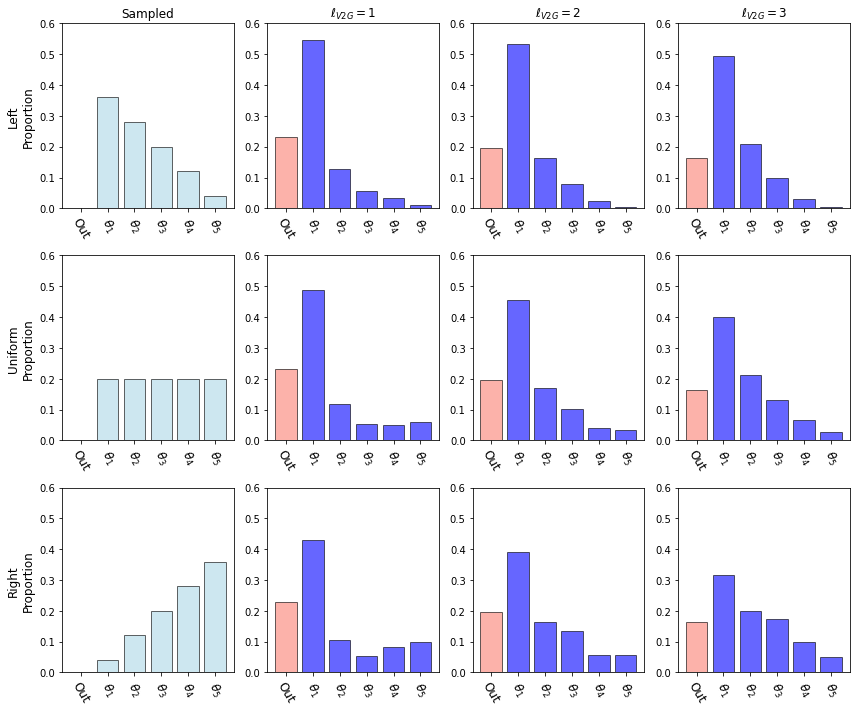

In [38]:
fig1 = plt.figure(figsize = (12, 10))
axs = fig1.subplots(ncols = 4, nrows = 3)
alpha = 0.6
l_probs = [0, 0.36, 0.28, 0.2 , 0.12, 0.04]
u_probs = [0, 0.2, 0.2, 0.2, 0.2, 0.2]
r_probs = [0, 0.04, 0.12, 0.2 , 0.28, 0.36]
x = [0, 1, 2, 3, 4, 5]
xticklabels = ["Out", r"$\theta_1$", r"$\theta_2$", r"$\theta_3$", r"$\theta_4$", r"$\theta_5$"]
axs[0,0].bar(x, l_probs, edgecolor = "black", color = "lightblue", alpha = alpha )
axs[1,0].bar(x, u_probs, edgecolor = "black", color = "lightblue", alpha = alpha )
axs[2,0].bar(x, r_probs, edgecolor = "black", color = "lightblue", alpha = alpha )

bar_color = ["salmon"] + ["blue"]*5

for i in range(1,4):
    # Left
    ly_vals = df_all_left[df_all_left["tau"] == i]["realized_counts"].iloc[0]
    axs[0,i].bar(x, ly_vals/np.sum(ly_vals), edgecolor = "black", color = bar_color, alpha = alpha)
    # Uniform
    uy_vals = df_all_uniform[df_all_uniform["tau"] == i]["realized_counts"].iloc[0]
    axs[1,i].bar(x, uy_vals/np.sum(uy_vals), edgecolor = "black", color = bar_color, alpha = alpha)
    # Right
    ry_vals = df_all_right[df_all_right["tau"] == i]["realized_counts"].iloc[0]
    axs[2,i].bar(x, ry_vals/np.sum(ry_vals), edgecolor = "black", color = bar_color, alpha = alpha)

for i in range(3):
    for j in range(4):
        axs[i,j].set_xticks(x)
        axs[i,j].set_xticklabels(xticklabels, fontsize = 12, rotation = -60, ha = "center")
        axs[i,j].set_ylim([0, 0.6])

column_titles = ["Sampled", r"$\ell_{V2G}=1$", r"$\ell_{V2G}=2$", r"$\ell_{V2G}=3$"]
for i in range(4):
    axs[0, i].set_title(column_titles[i], fontsize = 12)

row_titles = ["Left\nProportion", "Uniform\nProportion", "Right\nProportion"]
for i in range(3):
    axs[i, 0].set_ylabel(row_titles[i], fontsize = 12)

fig1.tight_layout()

In [39]:
df_three_bias = pd.concat((df_all_left, df_all_uniform, df_all_right))
df_three_bias["total_realized"] = df_three_bias["realized_counts"].apply(lambda x: np.sum(x))
df_three_bias["total_assigned"] = df_three_bias["assigned_counts"].apply(lambda x: np.sum(x))
df_three_bias["prop_participants"] = (df_three_bias["total_realized"] - df_three_bias["realized_counts"].apply(lambda x: x[0])) /df_three_bias["total_realized"]

df_three_bias.head(200)

,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type,market_rev,total_realized,total_assigned,prop_participants
0,1,100,0.2,0.01,24044.119829,-10302.152446,2431.943398,3667.955663,28863.816218,-617.443003,"[0, 1, 2, 3, 4]","[3318, 2603, 1850, 1112, 366]","[-1, 0, 1, 2, 3, 4]","[2129, 5041, 1183, 507, 299, 90]",7120,9249,leftFewBid,-4202.253386,9249,9249,0.769813
1,2,100,0.2,0.01,24110.142141,-10386.603639,2545.309752,3667.955663,28863.816218,-580.335851,"[0, 1, 2, 3, 4]","[2779, 2063, 1543, 912, 305]","[-1, 0, 1, 2, 3, 4]","[1487, 4044, 1248, 602, 177, 44]",6115,9249,leftFewBid,-4173.338225,7602,7602,0.804394
2,3,100,0.2,0.01,24224.027065,-10382.474353,2574.549288,3667.955663,28863.816218,-499.819751,"[0, 1, 2, 3, 4]","[2188, 1698, 1130, 701, 221]","[-1, 0, 1, 2, 3, 4]","[976, 2939, 1240, 576, 181, 26]",4962,9249,leftFewBid,-4139.969402,5938,5938,0.835635
0,1,100,0.2,0.01,24004.062966,-10323.848248,2465.144328,3667.955663,28863.816218,-669.004995,"[0, 1, 2, 3, 4]","[1834, 1863, 1837, 1839, 1876]","[-1, 0, 1, 2, 3, 4]","[2129, 4516, 1079, 507, 477, 541]",7120,9249,unifFewBid,-4190.748257,9249,9249,0.769813
1,2,100,0.2,0.01,24059.088533,-10416.812044,2609.333429,3667.955663,28863.816218,-665.204732,"[0, 1, 2, 3, 4]","[1498, 1481, 1536, 1524, 1563]","[-1, 0, 1, 2, 3, 4]","[1487, 3472, 1291, 785, 315, 252]",6115,9249,unifFewBid,-4139.522952,7602,7602,0.804394
2,3,100,0.2,0.01,24162.336191,-10470.884109,2693.634274,3667.955663,28863.816218,-592.185854,"[0, 1, 2, 3, 4]","[1178, 1246, 1146, 1218, 1150]","[-1, 0, 1, 2, 3, 4]","[976, 2369, 1254, 777, 401, 161]",4962,9249,unifFewBid,-4109.294173,5938,5938,0.835635
0,1,100,0.2,0.01,23951.904067,-10342.072502,2484.988499,3667.955663,28863.816218,-722.783810,"[0, 1, 2, 3, 4]","[385, 1050, 1815, 2616, 3383]","[-1, 0, 1, 2, 3, 4]","[2129, 3963, 985, 494, 773, 905]",7120,9249,rightFewBid,-4189.128340,9249,9249,0.769813
1,2,100,0.2,0.01,23984.598492,-10462.583747,2658.977578,3667.955663,28863.816218,-743.567219,"[0, 1, 2, 3, 4]","[288, 912, 1539, 2146, 2717]","[-1, 0, 1, 2, 3, 4]","[1487, 2970, 1253, 1028, 436, 428]",6115,9249,rightFewBid,-4135.650506,7602,7602,0.804394
2,3,100,0.2,0.01,24101.734079,-10538.424876,2786.595219,3667.955663,28863.816218,-678.208144,"[0, 1, 2, 3, 4]","[262, 726, 1176, 1656, 2118]","[-1, 0, 1, 2, 3, 4]","[976, 1878, 1178, 1032, 578, 296]",4962,9249,rightFewBid,-4083.873995,5938,5938,0.835635


## Different sample distribution conclusion

The **total revenue** results are very similar for the three distributions. The left-biased one (lower energy contracts) is slightly more profitable than the right-biased one (higher energy contracts).
This might seem counter-intuitive at first, since higher energy contracts offer more potential for proffiting from the imbalance market. However, let's not forget that they also come with a higher payoff to the owner.
These two factors have a balancing effect. Which is true when comparing the `market_rev` (especially `im_buy` & `im_sell`), and `owner_pay` columns in the above table. 
The effect of a bigger owner payoff is higher than the gain from flexibility in the imbalance market. This suggests that the VPP's utility function ($\kappa$), slightly overvalues flexibility. 
Since this effect is very small we can conclude that $\kappa$ is very close to being tuned correctly. This is overall a good result since $ \kappa$ was chosen in the contract design stage before any empirical validation.


## New baseline No-Control-Disch

In [40]:
# Bids with 0% participation
baseline_ASAP_bid_000_d = util.load_result("../w_mc_results/contract_no_solar/ev_asap_contract_revenue_allBidrealEV_0")
ASAP_bid_000_im_buy = np.sum(baseline_ASAP_bid_000_d["im_buy_0_samples_100_E"])
ASAP_bid_000_im_sell = np.sum(baseline_ASAP_bid_000_d["im_sell_0_samples_100_E"])
ASAP_bid_000_da_rev = np.sum(baseline_ASAP_bid_000_d["da_revenue0_samples_100_E"])
ASAP_bid_000_market_rev = ASAP_bid_000_im_buy + ASAP_bid_000_im_sell + ASAP_bid_000_da_rev

# Bids with 100% participation
baseline_ASAP_bid_100_d = util.load_result("../w_mc_results/contract_no_solar/ev_asap_contract_revenue_allBidrealEV_100")
ASAP_bid_100_im_buy = np.sum(baseline_ASAP_bid_100_d["im_buy_100_samples_100_E"])
ASAP_bid_100_im_sell = np.sum(baseline_ASAP_bid_100_d["im_sell_100_samples_100_E"])
ASAP_bid_100_da_rev = np.sum(baseline_ASAP_bid_100_d["da_revenue100_samples_100_E"])
ASAP_bid_100_market_rev = ASAP_bid_100_im_buy + ASAP_bid_100_im_sell + ASAP_bid_100_da_rev

In [41]:
baseline_DISCH_bid_000_d = util.load_result("../w_mc_results/contract_no_solar/ev_disch_contract_revenue_allBidrealEV_0")
baseline_DISCH_bid_100_d = util.load_result("../w_mc_results/contract_no_solar/ev_disch_contract_revenue_allBidrealEV_100")

# Bids with 0% participation
DISCH_bid_000_im_buy    = np.sum(baseline_DISCH_bid_000_d["im_buy_0_samples_100_E"])
DISCH_bid_000_im_sell   = np.sum(baseline_DISCH_bid_000_d["im_sell_0_samples_100_E"])
DISCH_bid_000_da_rev = np.sum(baseline_DISCH_bid_000_d["da_revenue0_samples_100_E"])
DISCH_bid_000_market_rev = DISCH_bid_000_im_buy + DISCH_bid_000_im_sell + DISCH_bid_000_da_rev

# Bids with 100% participation
DISCH_bid_100_im_buy    = np.sum(baseline_DISCH_bid_100_d["im_buy_100_samples_100_E"])
DISCH_bid_100_im_sell   = np.sum(baseline_DISCH_bid_100_d["im_sell_100_samples_100_E"])
DISCH_bid_100_da_rev = np.sum(baseline_DISCH_bid_100_d["da_revenue100_samples_100_E"])
DISCH_bid_100_market_rev = DISCH_bid_100_im_buy + DISCH_bid_100_im_sell + DISCH_bid_100_da_rev

# Print
print("IM Buy\t\tIM Sell\t\tDA Rev\t\tMarket Rev")
print(f"{ASAP_bid_000_im_buy:.2f}\t{ASAP_bid_000_im_sell:.2f}\t\t{ASAP_bid_000_da_rev:.2f}\t{ASAP_bid_000_market_rev:.2f}")
print(f"{ASAP_bid_100_im_buy:.2f}\t{ASAP_bid_100_im_sell:.2f}\t\t{ASAP_bid_100_da_rev:.2f}\t\t{ASAP_bid_100_market_rev:.2f}")
print(f"{DISCH_bid_000_im_buy:.2f}\t{DISCH_bid_000_im_sell:.2f}\t\t{DISCH_bid_000_da_rev:.2f}\t{DISCH_bid_000_market_rev:.2f}")
print(f"{DISCH_bid_100_im_buy:.2f}\t{DISCH_bid_100_im_sell:.2f}\t\t{DISCH_bid_100_da_rev:.2f}\t\t{DISCH_bid_100_market_rev:.2f}")


IM Buy		IM Sell		DA Rev		Market Rev
-5739.39	2362.27		-3941.82	-7318.95
-10475.63	2167.39		3667.96		-4640.28
-6423.32	3054.32		-3941.82	-7310.82
-11004.83	2704.71		3667.96		-4632.16


## Perfect predictions


In [42]:
print("With bids 100 paths")
df_perf_unif = read_results_exp_dict([1,2,3], [100], 0.2, 0.01, "perfect_all_unif",
                                      "tau_1_contract_online_algo_revenue_original_<perc>_perfectFore_unifEVsameBid_tau<tau>",
                                       directory = '../w_mc_results/realVisits/')
df_perf_unif["market_rev"] = df_perf_unif["im_buy"] + df_perf_unif["im_sell"] + df_perf_unif["da_rev"]


# Baseline correction
df_perf_unif["retail_rev"]  = baseline_allEVreal_retail_rev
df_perf_unif["total_rev"]   = df_perf_unif["retail_rev"] + df_perf_unif["market_rev"] + df_perf_unif["owner_pay"]

display(df_perf_unif.head())

With bids 100 paths


,tau,perc,kappa,gamma,total_rev,im_buy,im_sell,da_rev,retail_rev,owner_pay,assigned_idx,assigned_counts,realized_idx,realized_counts,participation,no_participation,type,market_rev
0,1,100,0.2,0.01,25522.849926,-9794.526436,3453.414592,3667.955663,28863.816218,-667.810110,"[0, 1, 2, 3, 4]","[1886, 1862, 1815, 1871, 1815]","[-1, 0, 1, 2, 3, 4]","[2129, 4532, 1071, 489, 540, 488]",7120,9249,perfect_all_unif,-2673.156182
1,2,100,0.2,0.01,25887.956996,-9914.061056,3937.308285,3667.955663,28863.816218,-667.062113,"[0, 1, 2, 3, 4]","[1485, 1523, 1580, 1496, 1518]","[-1, 0, 1, 2, 3, 4]","[1487, 3477, 1256, 809, 312, 261]",6115,9249,perfect_all_unif,-2308.797109
2,3,100,0.2,0.01,26135.948064,-9941.631582,4139.880717,3667.955663,28863.816218,-594.072951,"[0, 1, 2, 3, 4]","[1187, 1199, 1215, 1138, 1199]","[-1, 0, 1, 2, 3, 4]","[976, 2378, 1212, 813, 386, 173]",4962,9249,perfect_all_unif,-2133.795203
